In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Others
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Access Libraries
from google.cloud import bigquery

In [2]:
# Bring in datasets
client = bigquery.Client()
query_train="""
SELECT * FROM `mwe-sanofi-ml-workshop.chicago_taxi.train_results` Limit 20000
"""

df_train = client.query(query_train).to_dataframe()
df_train.head()

,log_trip_seconds,distance,hour_start,month_start,weekday,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,6.802395,4511.247153,19,9,Thu,17031061500,17031241400,6,24,41.945282,-87.661545,41.906026,-87.675312
1,5.886104,3338.217673,2,8,Sat,17031051400,17031241400,5,24,41.935749,-87.680980,41.906026,-87.675312
2,4.787492,899.739256,20,3,Fri,17031070600,17031062800,7,6,41.928763,-87.665677,41.936159,-87.661265
3,6.040255,1968.116956,1,2,Sun,17031832100,17031062800,6,6,41.952823,-87.653244,41.936159,-87.661265
4,7.038784,6303.427819,0,8,Sat,17031243100,17031061902,24,6,41.892355,-87.674507,41.943155,-87.640698


In [3]:
query_test="""
SELECT * FROM `mwe-sanofi-ml-workshop.chicago_taxi.test_results` Limit 10000
"""

df_test = client.query(query_test).to_dataframe()
df_test.head()

,log_trip_seconds,distance,hour_start,month_start,weekday,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,5.703782,977.094145,17,1,Tue,17031063301,17031061902,6,6,41.934540,-87.643023,41.943155,-87.640698
1,7.138867,5765.487047,18,11,Wed,17031061902,17031210601,6,21,41.943155,-87.640698,41.937494,-87.709987
2,5.480639,1504.029332,10,10,Sun,17031411000,17031836200,41,41,41.790506,-87.583144,41.790469,-87.601285
3,6.396930,2866.170369,2,7,Sun,17031070600,17031832100,7,6,41.928763,-87.665677,41.952823,-87.653244
4,6.291569,1941.942145,0,7,Sat,17031062500,17031832100,6,6,41.941488,-87.671108,41.952823,-87.653244


In [4]:
query_val="""
SELECT * FROM `mwe-sanofi-ml-workshop.chicago_taxi.val_results` Limit 10000
"""

df_val = client.query(query_val).to_dataframe()
df_val.head()

,log_trip_seconds,distance,hour_start,month_start,weekday,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,6.173786,807.944121,19,6,Fri,17031060100,17031050100,6,5,41.957531,-87.666611,41.957843,-87.676373
1,6.659294,4283.187886,1,6,Sun,9999,9999,10,17,41.985015,-87.804532,41.946511,-87.806020
2,6.059123,2669.504128,23,4,Thu,17031832300,17031063400,22,6,41.919225,-87.671446,41.934659,-87.646730
3,6.920672,3969.329419,17,4,Sat,9999,9999,13,11,41.983636,-87.723583,41.978830,-87.771167
4,6.888572,15007.925710,7,4,Sun,9999,9999,64,33,41.779583,-87.768511,41.857184,-87.620335


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(20000, 13)
(10000, 13)
(10000, 13)


In [6]:
df_master = df_test
df_master = pd.concat([df_train, df_test,df_val], axis=0)
df_master.head()

,log_trip_seconds,distance,hour_start,month_start,weekday,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,6.802395,4511.247153,19,9,Thu,17031061500,17031241400,6,24,41.945282,-87.661545,41.906026,-87.675312
1,5.886104,3338.217673,2,8,Sat,17031051400,17031241400,5,24,41.935749,-87.680980,41.906026,-87.675312
2,4.787492,899.739256,20,3,Fri,17031070600,17031062800,7,6,41.928763,-87.665677,41.936159,-87.661265
3,6.040255,1968.116956,1,2,Sun,17031832100,17031062800,6,6,41.952823,-87.653244,41.936159,-87.661265
4,7.038784,6303.427819,0,8,Sat,17031243100,17031061902,24,6,41.892355,-87.674507,41.943155,-87.640698


### Distribution of trip duration

**Step 1:** Let's check how long the taxi-trips usually last.

In [2]:
#TODO

Are there trips which are either too short or too long?

In [3]:
#TODO

### Distribution of trip Distance

**Step 2:** Do the taxi-trips usually cover only short distances?

In [4]:
#TODO

Let's, through visualization, get an estimate of the number of taxi-trips having unusually large distances.

In [5]:
#TODO

### No. of distinct Pickup/Drop Communities

In [11]:
df_master['trips_bw_community'] = list(zip(df_master.pickup_community_area, df_master.dropoff_community_area))
len(df_master['trips_bw_community'].unique())

1930

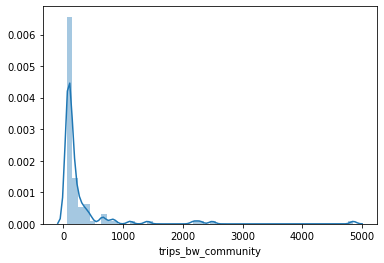

In [12]:
trips = pd.DataFrame(df_master['trips_bw_community'].value_counts())
trips_Top100 = trips['trips_bw_community'].head(100)
sns.distplot(trips_Top100)
plt.show()

-Most of the trips skewed towards 0

### Top 100 community pair with by number of trips

**Step 3:** Let us draw a plot showing the top 100 community-combinations for taxi-rides e.g. most frequent rides between communities (say) A and B, while communities (say) X and Y being the second highest in number, and so on..

In [7]:
#TODO

### Large/Medium/short distance trips

**Step 4:** Let's classify taxi-trips into 4 categories: "Short", "Medium", "Large" and "Very Large", based on how many standard deviations away, the 'distance' column values are from the mean.

In [14]:
def trips_by_distance(n,k=3):
    """
    Arguments: 
              n -> distance
              k -> Standard Deviation
    Return:
           Segments of 1. Very Large 2. Large 3. Medium 4. Short  
             
    """
    if n > (df_master.distance.mean() + 3*df_master.distance.std()):
        return "Very Large"
    elif (n <= (df_master.distance.mean() + 3*df_master.distance.std())) & (n > (df_master.distance.mean() + df_master.distance.std())):
        return "Large"
    elif (n <= (df_master.distance.mean() + df_master.distance.std())) & (n >= (df_master.distance.mean() - df_master.distance.std())):
        return "Medium"
    elif (n < (df_master.distance.mean() - df_master.distance.std())):
        return "Short"
    

Apply this helper function to plot how many taxi-trips fall in which of these 4 categories.

In [9]:
#TODO

### Month Parting

**Step 5:** Do the taxi-ride distances travelled, change significantly during different months of the year? Or is there any component of seasonality e.g. more during winters and less during summers etc.?

Further, how different is the proportion of trip categories (4 selected above), from one month to another?

In [10]:
#TODO

### Week parting

**Step 6:** Repeat the previous step, this time according to Day of the Week.

In [12]:
#TODO

### Day Parting

**Step 7:** Is the distribution of taxi-ride distance travelled, uniform across different hours of the day? Let's find out..

In [13]:
#TODO

### Correlation Matrix

**Step 8:** Let's plot a matrix showing correlation between all numerical columns in the dataset.

In [14]:
#TODO

### Scatter plots of pick-up and drop-off locations

**Step 9:** Let's plot the locations of start and end points of taxi-rides, based on their longitude and latitude values.

In [15]:
#TODO